In [26]:
%load_ext autoreload
%autoreload 2
import numpy as np
from juno import utils
from pprint import pprint
from juno.juno_custom.elements.Herschel.structures import HerschelSettings, HerschelSimSettings

from juno.juno_custom.tools import sim_tools
import juno.juno_custom.elements.Herschel.utils as h_utils
import matplotlib.pyplot as plt
from juno.Lens import Lens, LensSettings, LensType
from juno.Medium import Medium

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
config = utils.load_yaml_config(config_filename=r'C:\Users\User\Github\juno\juno\juno_custom\config.yaml')
settings = HerschelSettings.from_dict(config.get('HerschelSettings'))
sim_settings = HerschelSimSettings.from_dict(config.get('HerschelSimSettings'))
wavelength = sim_settings.wavelength
pixel_size= wavelength * 0.5

In [28]:
settings.calculate_radii(pixel_size=pixel_size)
raw_profiles = h_utils.create_raw_profiles(settings)
profiles = h_utils.calculate_profiles(settings, raw_profiles, pixel_size)
lenses = h_utils.generate_lenses(settings, profiles)
padded_lenses = h_utils.calculate_padding(profiles=profiles, lenses=lenses, settings=settings, sim_settings=sim_settings, pixel_size=pixel_size)

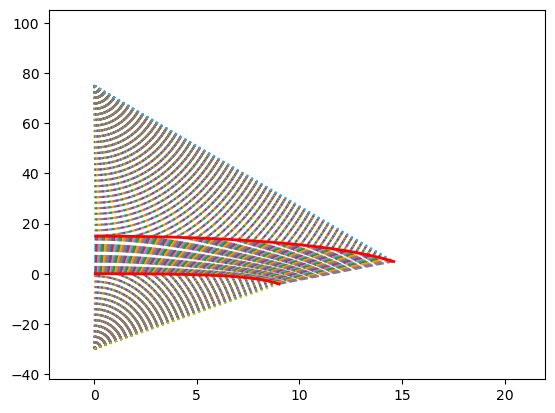

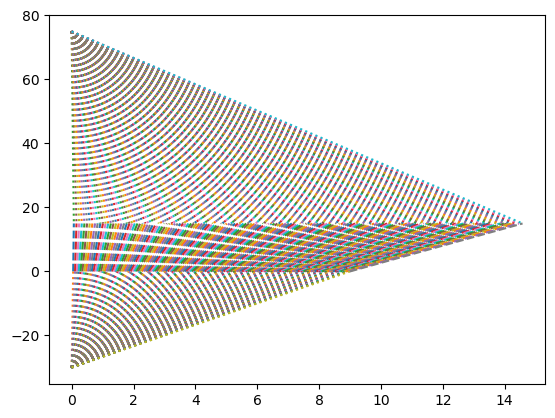

In [29]:
h_utils.display_ray_tracing(settings, raw_profiles, 1.405)

In [30]:
raw_profiles.x_first[-1]
raw_profiles.x_second[-1]

14.59482455864862

In [31]:
sim_lens, sim_lens_padding = sim_tools.generate_sim_lens(settings, sim_settings, pixel_size)
sim_lens.profile = sim_lens.profile.max() - sim_lens.profile
sim_wavefront = sim_tools.generate_sim_wavefront(sim_lens=sim_lens, sim_lens_padding=sim_lens_padding, settings=settings, sim_settings=sim_settings)

In [32]:
start = -settings.z_medium_o * 0.95
stop = -settings.z_medium_o * 1.05
start = -settings.z_medium_o * 0
stop = -settings.z_medium_o * 2
start = -settings.z_medium_o * -1#-1.1
stop = -settings.z_medium_o * 0

step = (stop-start)/(50-1)
distances = np.arange(start, stop, step)
distances = np.append(distances, stop)
output, propagation, output_array = sim_tools.propagate_zero_lens(wavefront=sim_wavefront, 
                                                settings=settings,
                                                sim_settings=sim_settings, 
                                                distances=distances,
                                                pixel_size=pixel_size)

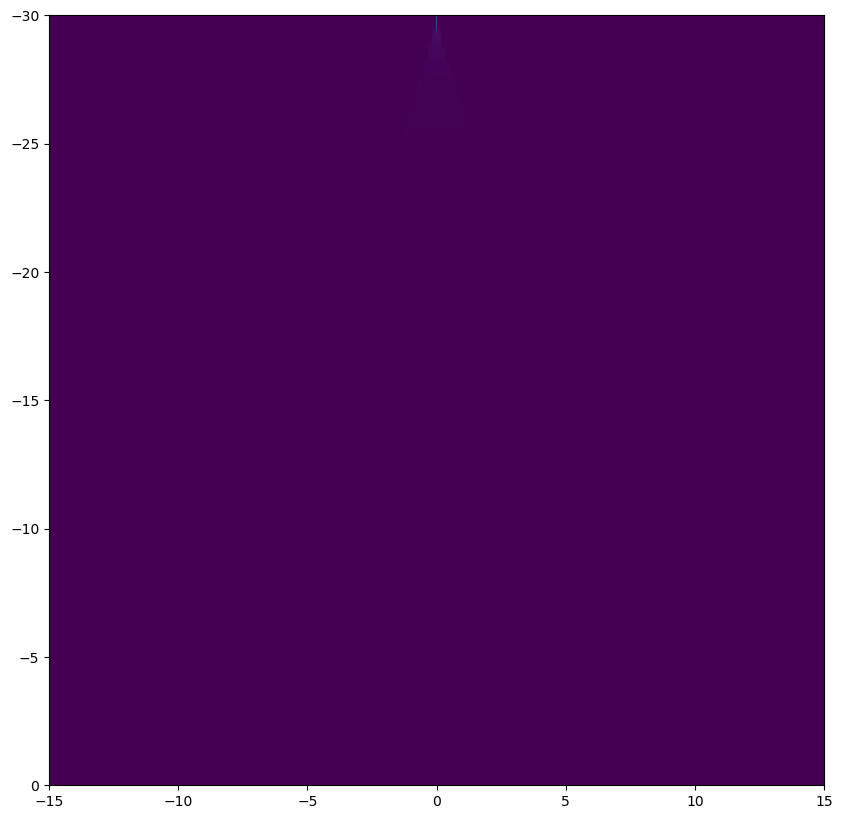

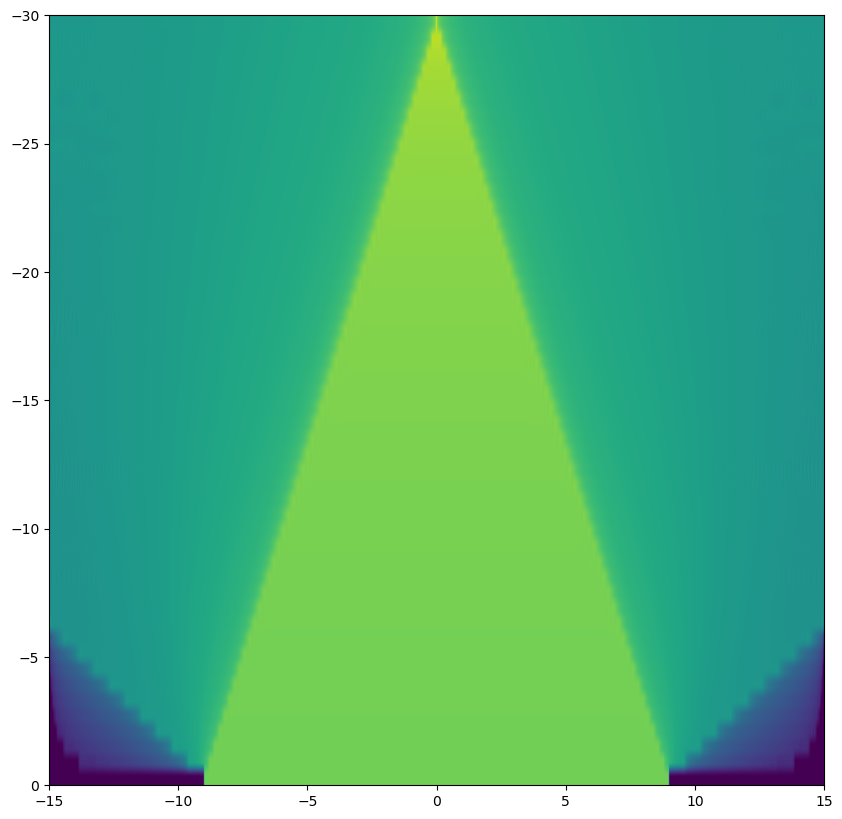

In [33]:
extent = [-output_array.shape[1]*pixel_size/2, output_array.shape[1]*pixel_size/2, distances[-1], distances[0]]

plt.figure(figsize=(10,10))
plt.imshow(output_array, aspect='auto', extent=extent)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(np.log(output_array+1e-12), aspect='auto', extent=extent)
plt.show()

(1, 6001)
(1, 10001)


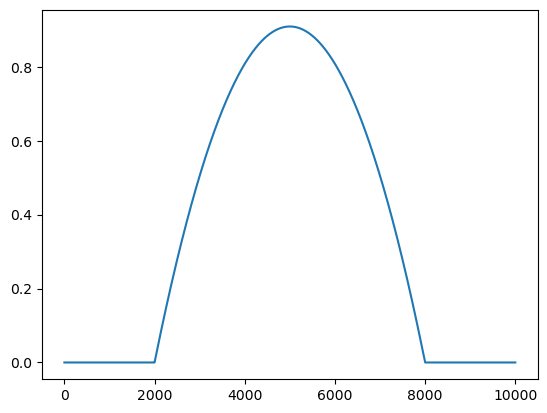

In [64]:
lmed = 1
fdist = -90
lens_settings = LensSettings(
    diameter=18,
    height=sim_tools.height_from_focal_distance(diameter=18, lens_medium=1, output_medium=2, focal_distance=fdist),
    exponent=2,
    medium=lmed,
    lens_type=LensType.Cylindrical,
    escape_path=0.,
    # inverted=True
)
lens1 = Lens(diameter=18, height=sim_tools.height_from_focal_distance(diameter=18, lens_medium=lmed, output_medium=2, focal_distance=fdist), exponent=2, medium=Medium(lmed), lens_type=LensType.Cylindrical, settings=lens_settings)

lens1.generate_profile(pixel_size=pixel_size)

print(lens1.profile.shape)
# pad to 6667
# n = 10001
pad = (n - lens1.profile.shape[1])//2
lens1.profile = np.pad(lens1.profile, ((0, 0), (pad, pad)), mode='constant', constant_values=0)
print(lens1.profile.shape)

plt.plot(lens1.profile[0])

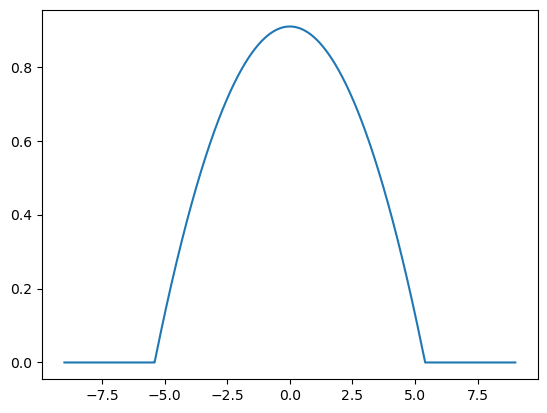

In [65]:
# plt.plot(lens1.profile[0, :])
x = np.linspace(-lens1.diameter/2, lens1.diameter/2, lens1.profile.shape[1])
plt.plot(x, lens1.profile[0, :])

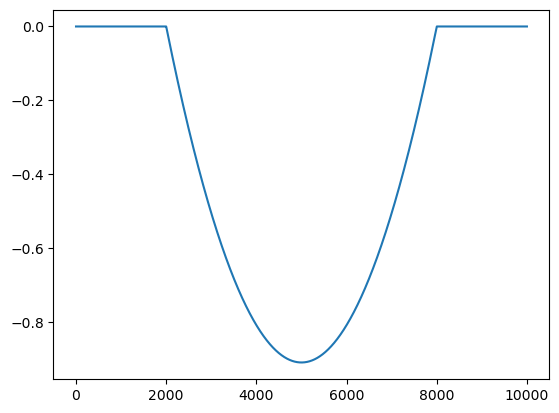

In [66]:
lens1.profile = -lens1.profile
# lens1.profile = np.zeros_like(lens1.profile)
plt.plot(lens1.profile[0, :])
delta = sim_tools.delta_map_from_height(lens1.profile, lmed, 2)
phase = sim_tools.phase_map_from_delta(delta, sim_settings.wavelength)
first_wavefront = sim_tools.wavefront_from_phase(phase, amplitude=1)

In [67]:
start = 0
stop = settings.thickness
step = (stop-start)/(200-1)
distances = np.arange(start, stop, step)
distances = np.append(distances, stop)
output2, propagation2, output_array2 = sim_tools.propagate_first_lens(previous_wavefront=propagation, wavefront=first_wavefront, settings=settings, distances=distances, sim_settings=sim_settings, pixel_size=pixel_size)


In [68]:
print(profiles.x_second[-1] * pixel_size)
print(profiles.x_first[-1] * pixel_size)

0.043785000000000004
0.027


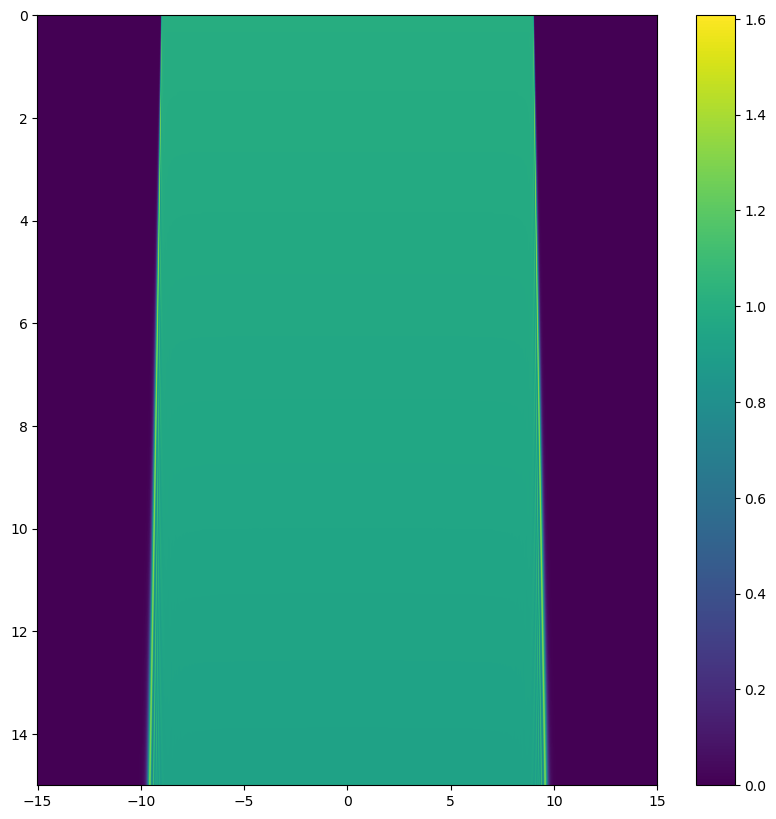

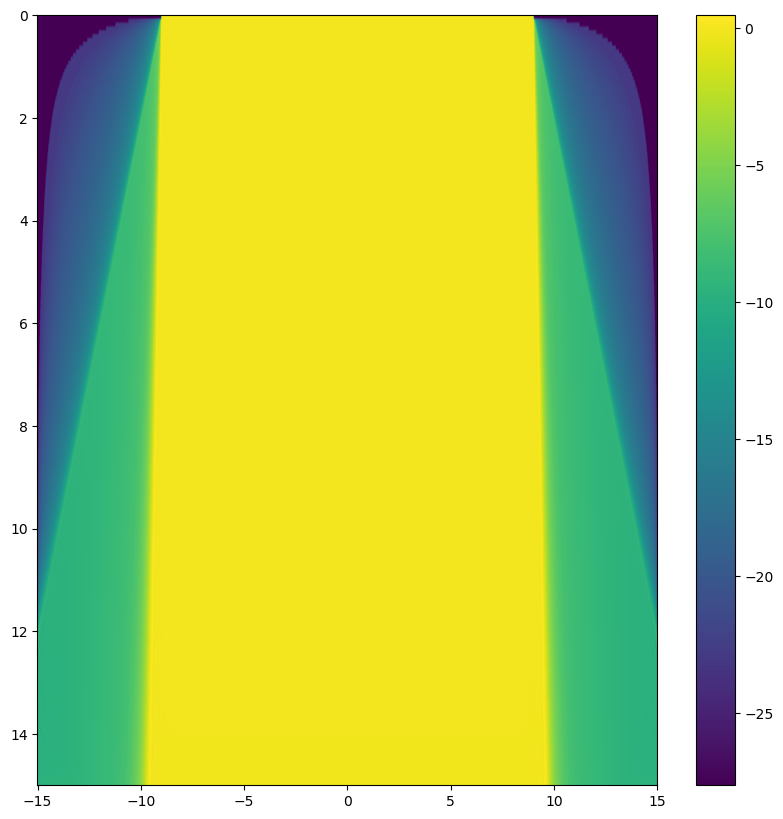

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [69]:
extent = [-output_array2.shape[1]*pixel_size/2, output_array2.shape[1]*pixel_size/2, distances[-1], distances[0]]

plt.figure(figsize=(10,10))
plt.imshow(output_array2, aspect='auto', extent=extent)
plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(np.log(output_array2+1e-12), aspect='auto', extent=extent)
plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))


In [368]:
lmed = 2
ldiam = 18
lens_settings = LensSettings(
    diameter=ldiam,
    height=sim_tools.height_from_focal_distance(diameter=ldiam, lens_medium=lmed, output_medium=1, focal_distance=60),
    exponent=2,
    medium=lmed,
    lens_type=LensType.Cylindrical,
    escape_path=0.,
)
lens2 = Lens(diameter=18, height=sim_tools.height_from_focal_distance(diameter=ldiam, lens_medium=lmed, output_medium=1, focal_distance=60), exponent=2, medium=Medium(lmed), lens_type=LensType.Cylindrical, settings=lens_settings)

lens2.generate_profile(pixel_size=pixel_size)

print(lens2.profile.shape)
# pad to 6667
n = 10001
pad = (n - lens2.profile.shape[1])//2
lens2.profile = np.pad(lens2.profile, ((0, 0), (pad, pad)), mode='constant', constant_values=0)
print(lens2.profile.shape)

(1, 6001)
(1, 10001)


In [369]:
# lens2.profile = -lens2.profile
profile = lens2.profile
delta = sim_tools.delta_map_from_height(profile, settings.n_lens, sim_settings.n_medium_o_sim)
phase = sim_tools.phase_map_from_delta(delta, sim_settings.wavelength)
wavefront_second = sim_tools.wavefront_from_phase(phase, amplitude=1)

In [370]:
start = 0
stop = 100
step = (stop-start)/(200-1)
distances = np.arange(start, stop, step)
distances = np.append(distances, stop)
print(f"Step: {step}")
output3, propagation3, output_array3 = sim_tools.propagate_second_lens(previous_wavefront=propagation2, wavefront=wavefront_second, settings=settings, distances=distances, sim_settings=sim_settings, pixel_size=pixel_size)


Step: 0.5025125628140703


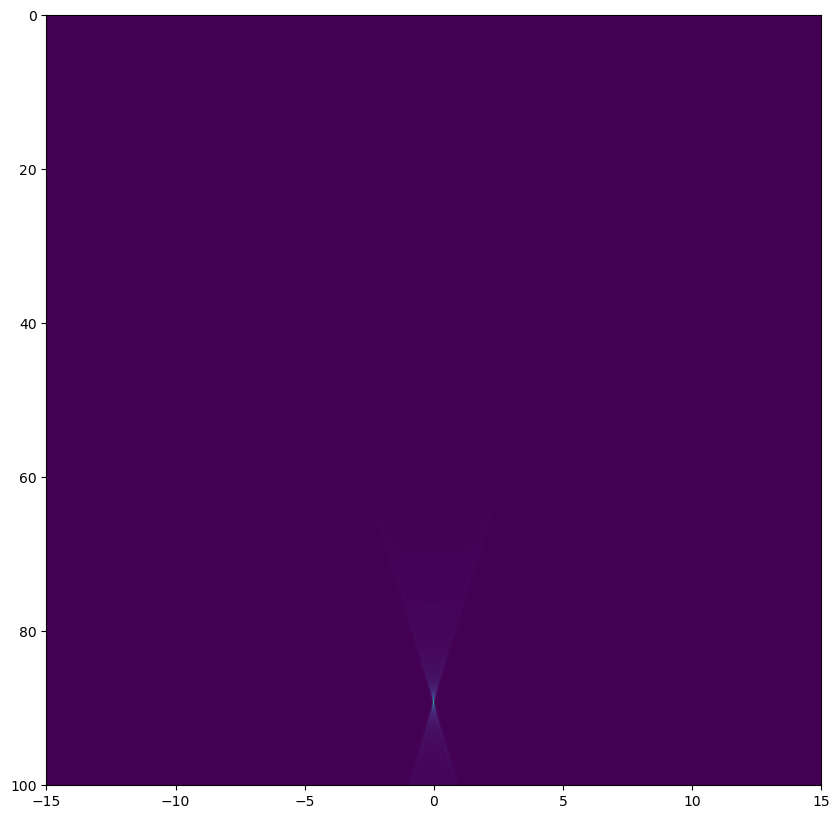

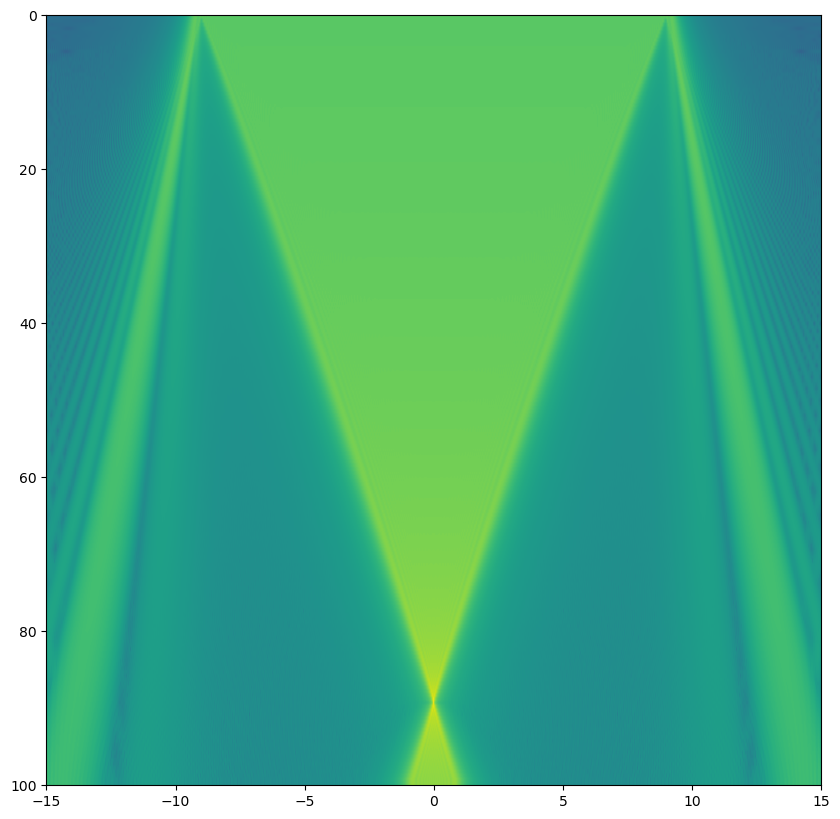

In [371]:
extent = [-output_array3.shape[1]*pixel_size/2, output_array3.shape[1]*pixel_size/2, distances[-1], distances[0]]

plt.figure(figsize=(10,10))
plt.imshow(output_array3, aspect='auto', extent=extent)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(np.log(output_array3+1e-12), aspect='auto', extent=extent)
plt.show()